In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [54]:
df = pd.read_excel('churn_data.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [56]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


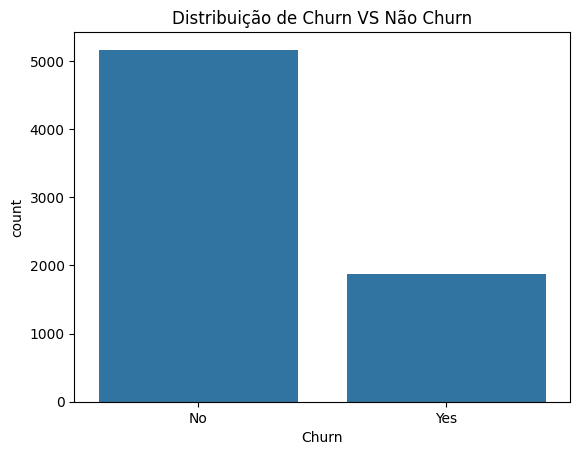

In [57]:
# Verificando a distribuição da Variavel 

sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Churn VS Não Churn')
plt.show()

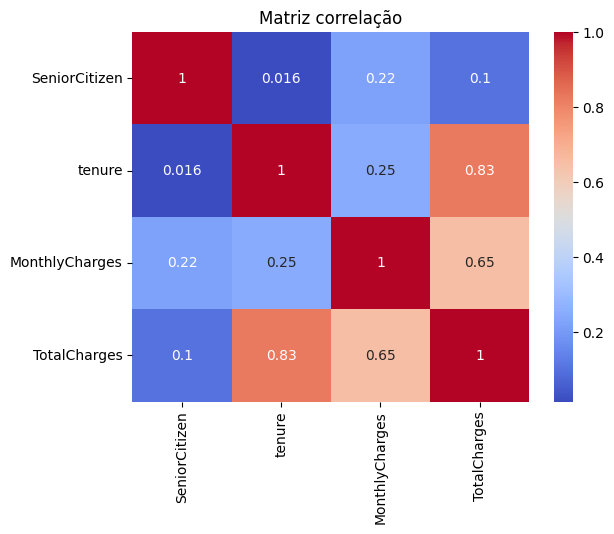

In [58]:
#Verificar a correlação entre as variaveis numéricas

corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz correlação')
plt.show()

In [64]:
df = df.drop(['customerID'], axis=1)

In [65]:
#ver as colunas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [66]:
# Criar uma instância do OneHotEncoder
# drop='first' para evitar multicolinearidade
encoder = OneHotEncoder(sparse_output=False, drop='first')  

# Aplicar o encoder às colunas categóricas
encoded_data = encoder.fit_transform(df[categorical_columns])

# Converter o resultado em um DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Visualizar o DataFrame codificado
print(encoded_df.head())

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0          0.0          1.0             0.0               0.0   
1          1.0          0.0             0.0               1.0   
2          1.0          0.0             0.0               1.0   
3          1.0          0.0             0.0               0.0   
4          0.0          0.0             0.0               1.0   

   MultipleLines_No phone service  MultipleLines_Yes  \
0                             1.0                0.0   
1                             0.0                0.0   
2                             0.0                0.0   
3                             1.0                0.0   
4                             0.0                0.0   

   InternetService_Fiber optic  InternetService_No  \
0                          0.0                 0.0   
1                          0.0                 0.0   
2                          0.0                 0.0   
3                          0.0                 0.0   
4 

In [67]:
# Selecionar colunas numéricas
numeric_columns = df.select_dtypes(exclude=['object', 'category']).columns

In [69]:
# Concatenar colunas numéricas com as colunas codificadas
df_final = pd.concat([df[numeric_columns], encoded_df], axis=1)

# Visualizar o DataFrame final
df_final.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0,45,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [74]:
X = df_final.drop('Churn_Yes', axis=1)
y = df_final['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
## Usando o modelo de regressão linear

Regr_linear = LogisticRegression()

Regr_linear.fit(X_train, y_train)


c:\Users\Mauro Jorge Ernesto\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
#Fazendo a previsão
y_prev = Regr_linear.predict(X_test)

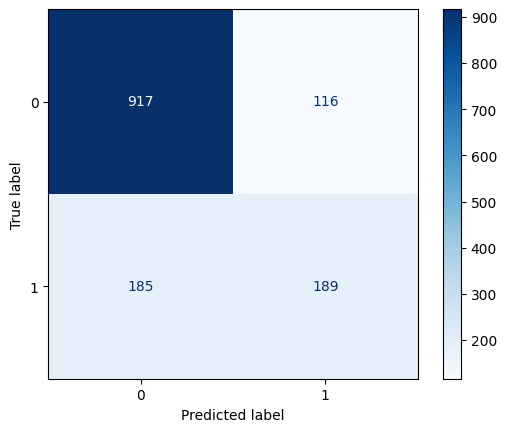

In [90]:
# Criando a matriz de confusão
cm = confusion_matrix(y_test, y_prev)

# Exibindo a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [91]:
print(f"Acurácia (Treino): {accuracy_score(y_train, Regr_linear.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, Regr_linear.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, Regr_linear.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, Regr_linear.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, Regr_linear.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, Regr_linear.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, Regr_linear.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, Regr_linear.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, Regr_linear.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, Regr_linear.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, Regr_linear.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, Regr_linear.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8083555555555556
Acurácia (Teste): 0.7860696517412935
Acurácia Balanceada (Treino): 0.7290856527407743
Acurácia Balanceada (Teste): 0.6965266525513665
Precision (Treino): 0.665871121718377
Precision (Teste): 0.6196721311475409
Recall (Treino): 0.559866220735786
Recall (Teste): 0.5053475935828877
F1-Score (Treino): 0.6082848837209303
F1-Score (Teste): 0.5567010309278351
ROCAUC (Treino): 0.8496404479823787
ROCAUC (Teste): 0.8286104021825222
